In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# Load Data

In [71]:
# read csv file
data = pd.read_csv("Lung Cancer Dataset.csv")

# Data Preprocessing

In [72]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [73]:
# Display the first few rows of the dataset to understand its structure
data.head(25)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [74]:
#show the row and column of dataset
data.shape

(5000, 18)

In [65]:
# Check for missing values
print(data.isnull().sum())

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [75]:
# Drop the unnecessary columns
data = data.drop('SMOKING_FAMILY_HISTORY', axis=1)

In [76]:
# Convert the pulmonary disease column to binary format
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

In [77]:
print(data['PULMONARY_DISEASE'].value_counts())

PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64


In [78]:
# Features and Target
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

In [79]:
#show the row and column of dataset after preprocess
data.shape

(5000, 17)

In [80]:
# split data 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [81]:
#show records of each features
data.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.209600,0.4074
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.407064,0.4914
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.0000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.0000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.0000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,1.0000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.0000


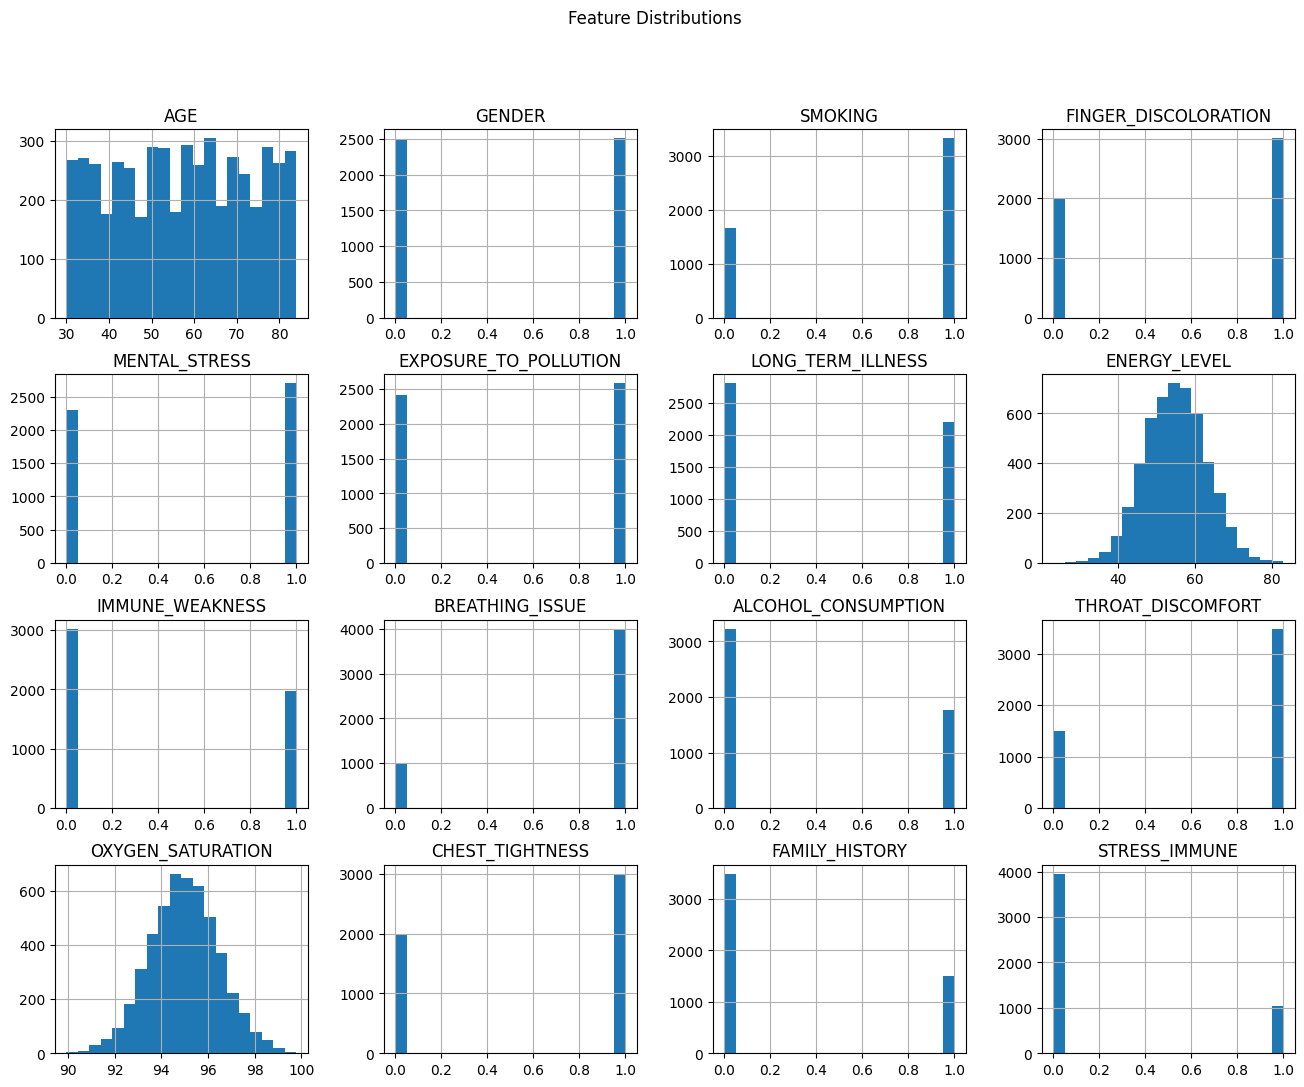

In [82]:
#show the data of features by plotting in graph mode
X.hist(bins=20, figsize=(16, 12))
plt.suptitle("Feature Distributions")
plt.show()

# Model Training

# Decision Tree (Non-Hyperparameter Tuned)

In [84]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=25, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_pred_dt = dt_model.predict(X_test)
y_scores_dt = dt_model.predict_proba(X_test)[:,1]

# Evaluate the model
print("Decision Tree Model")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred_dt))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model
Training Accuracy: 0.866
Test Accuracy: 0.877

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2392
           1       0.80      0.89      0.84      1608

    accuracy                           0.87      4000
   macro avg       0.86      0.87      0.86      4000
weighted avg       0.87      0.87      0.87      4000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       571
           1       0.82      0.91      0.86       429

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



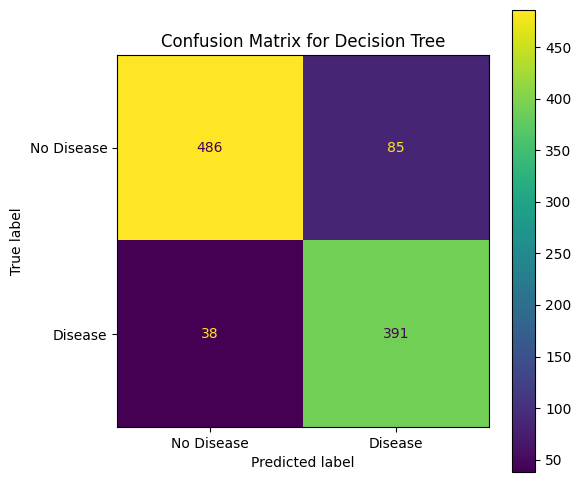

In [87]:

# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Disease', 'Disease'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix for Decision Tree')

disp_dt.plot(ax=ax)
plt.grid(False)
plt.show()

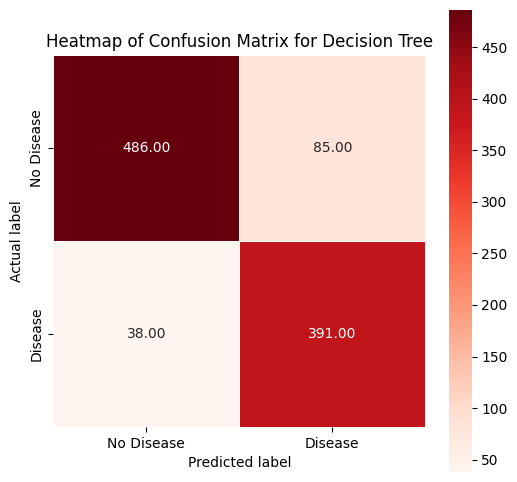

In [88]:
# Plot heatmap for Decision Tree
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Heatmap of Confusion Matrix for Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

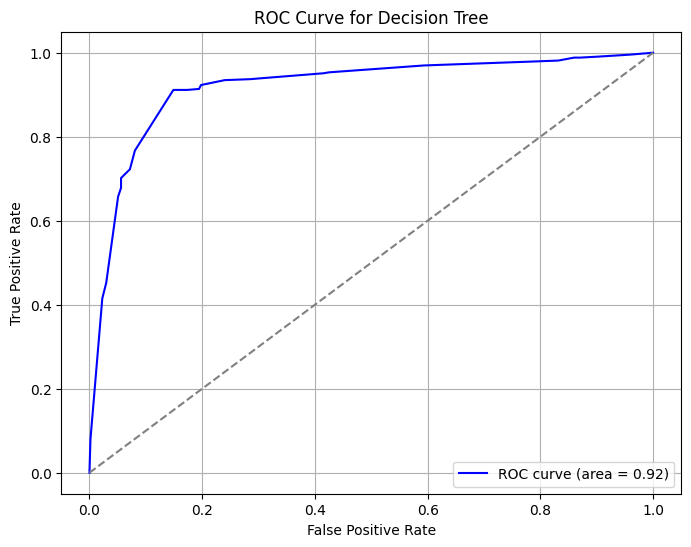

In [89]:
# Decision Tree ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

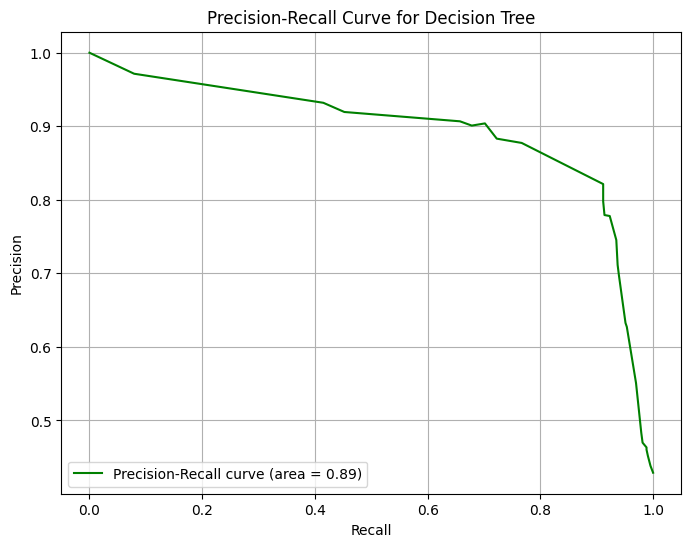

In [90]:
# Decision Tree Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_scores_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, color='green', label='Precision-Recall curve (area = {:.2f})'.format(pr_auc_dt))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [92]:
#learning plot curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

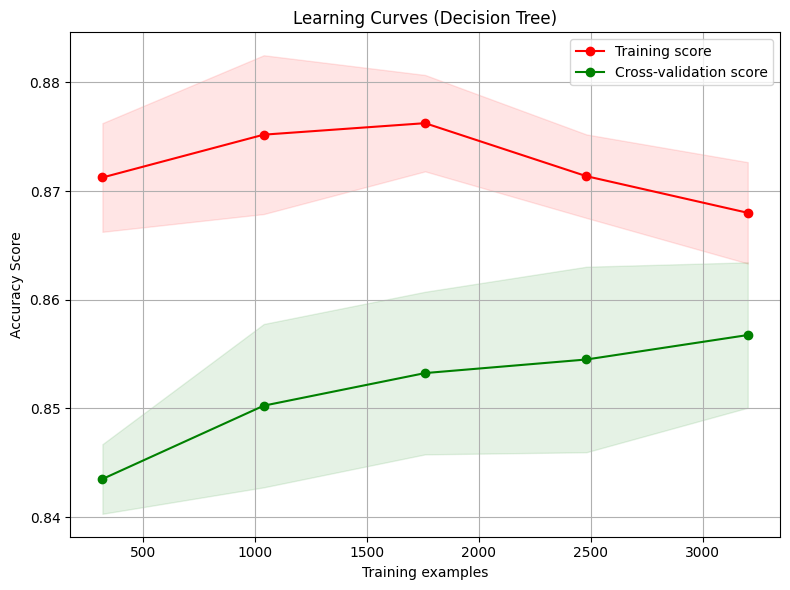

In [108]:
# Plot learning curves for Decision Tree
plot_learning_curve(dt_model, "Learning Curves (Decision Tree)", X_train, y_train, cv=5)

# Decision Tree (Hypertuning)

In [95]:

# Decision Tree (Hypertuning)
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("Lung Cancer Dataset.csv")  # Adjust path if needed
df['PULMONARY_DISEASE'] = LabelEncoder().fit_transform(df['PULMONARY_DISEASE'])  # YES → 1, NO → 0

# Split features and target
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
param_grid_dt = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize and train the GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_dt.best_score_)

# Make predictions using the best estimator
y_pred_dt = grid_dt.best_estimator_.predict(X_test)

# Evaluate the model
print("\nDecision Tree Model")
y_train_pred_dt = grid_dt.best_estimator_.predict(X_train) 
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_dt))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred_dt))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_dt))

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best cross-validation accuracy for Decision Tree: 0.89275

Decision Tree Model
Training Accuracy: 0.914
Test Accuracy:  0.913

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2392
           1       0.90      0.88      0.89      1608

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       571
           1       0.90      0.90      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



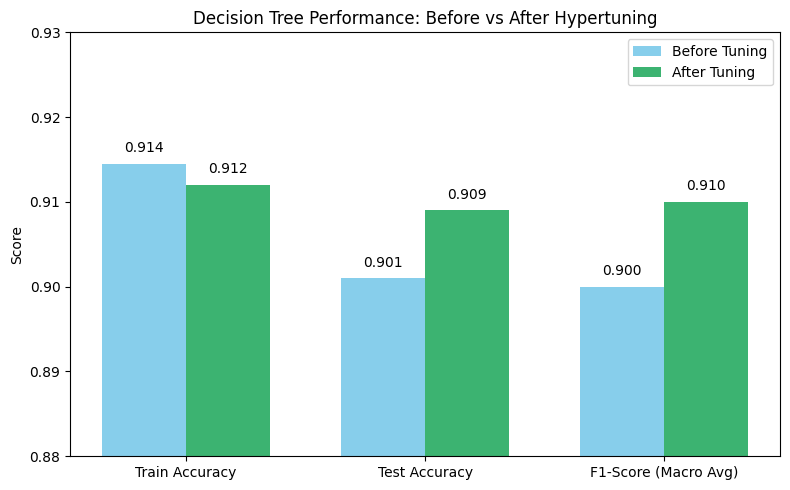

In [96]:
#Bar to view the tune vs untune Decision Tree Performance
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for both models
metrics = ['Train Accuracy', 'Test Accuracy', 'F1-Score (Macro Avg)']

# Before tuning scores
no_tune = [0.9145, 0.901, 0.90]

# After hypertuning scores
tuned = [0.912, 0.909, 0.91]

# Set up bar chart position
x = np.arange(len(metrics))
width = 0.35

# Create figure and bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, no_tune, width, label='Before Tuning', color='skyblue')
bars2 = ax.bar(x + width/2, tuned, width, label='After Tuning', color='mediumseagreen')

# Label and format
ax.set_ylabel('Score')
ax.set_title('Decision Tree Performance: Before vs After Hypertuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.88, 0.93)
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


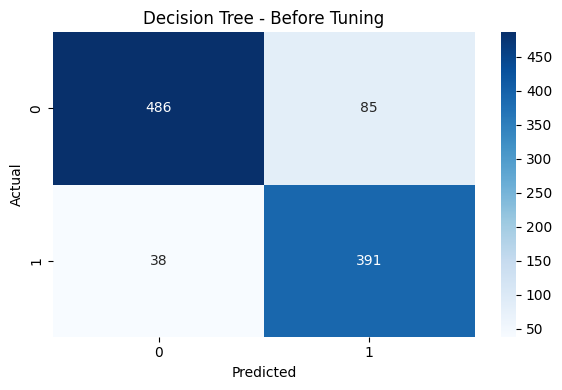

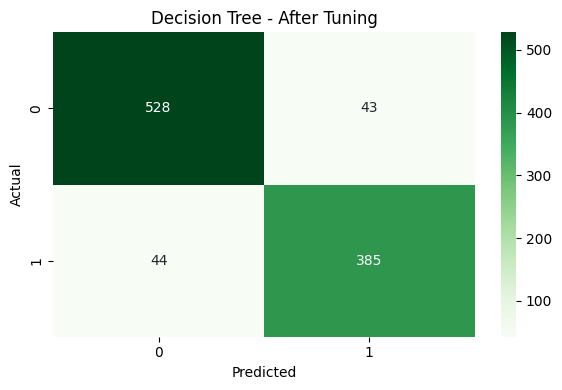

In [102]:
# Load and encode the dataset
df = pd.read_csv("Lung Cancer Dataset.csv")  # Update path if needed
df['PULMONARY_DISEASE'] = LabelEncoder().fit_transform(df['PULMONARY_DISEASE'])

# Split features and target
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train no-tuning Decision Tree model
dt_base = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=25)
dt_base.fit(X_train, y_train)
y_pred_base = dt_base.predict(X_test)
y_scores_base = dt_base.predict_proba(X_test)[:, 1]

# Train hypertuned Decision Tree model (Using best parms found earlier)
param_grid_dt = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', None],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
dt_tuned = grid_dt.best_estimator_
y_pred_tuned = dt_tuned.predict(X_test)
y_scores_tuned = dt_tuned.predict_proba(X_test)[:, 1]

#Confusion Matrix - Before Tuning ---
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Before Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#Confusion Matrix - After Tuning ---
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - After Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

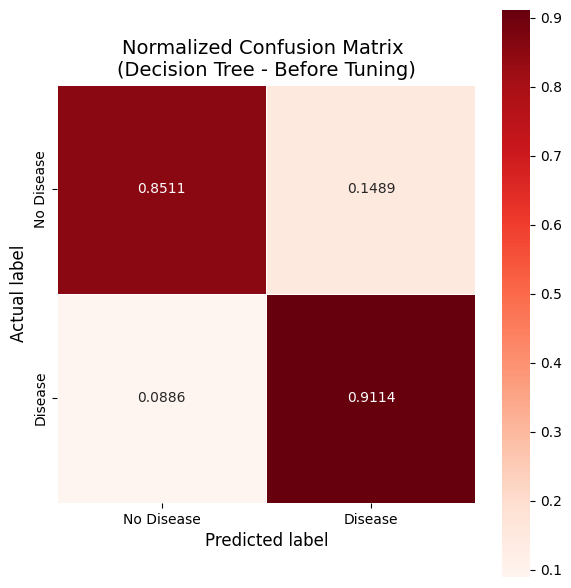

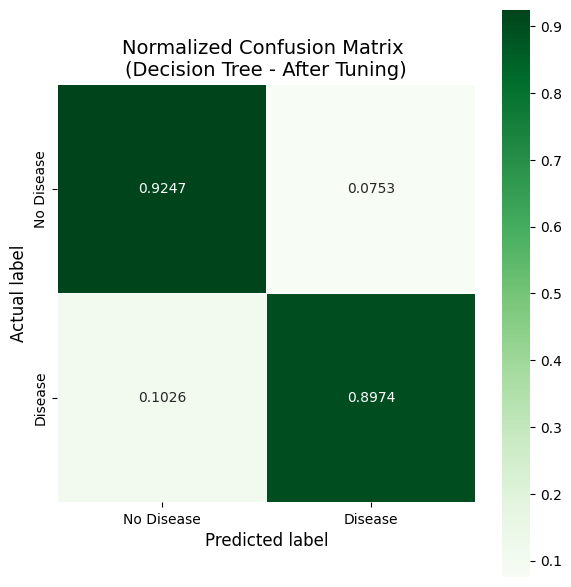

In [105]:
# Predictions from Decision Tree
y_pred_dt_no_tune = dt_base.predict(X_test)
y_pred_dt_tuned = dt_tuned.predict(X_test)

# Raw confusion matrices
cm_dt_no_tune = confusion_matrix(y_test, y_pred_dt_no_tune)
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)

# Normalize
cm_dt_no_tune_norm = cm_dt_no_tune.astype('float') / cm_dt_no_tune.sum(axis=1)[:, np.newaxis]
cm_dt_tuned_norm = cm_dt_tuned.astype('float') / cm_dt_tuned.sum(axis=1)[:, np.newaxis]

# Heatmap - Before Tuning
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt_no_tune_norm, annot=True, fmt='.4f', linewidths=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Normalized Confusion Matrix \n(Decision Tree - Before Tuning)', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('Actual label', fontsize=12)
plt.tight_layout()
plt.show()

# Heatmap - After Tuning
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt_tuned_norm, annot=True, fmt='.4f', linewidths=0.5, square=True, cmap='Greens',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Normalized Confusion Matrix \n(Decision Tree - After Tuning)', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('Actual label', fontsize=12)
plt.tight_layout()
plt.show()


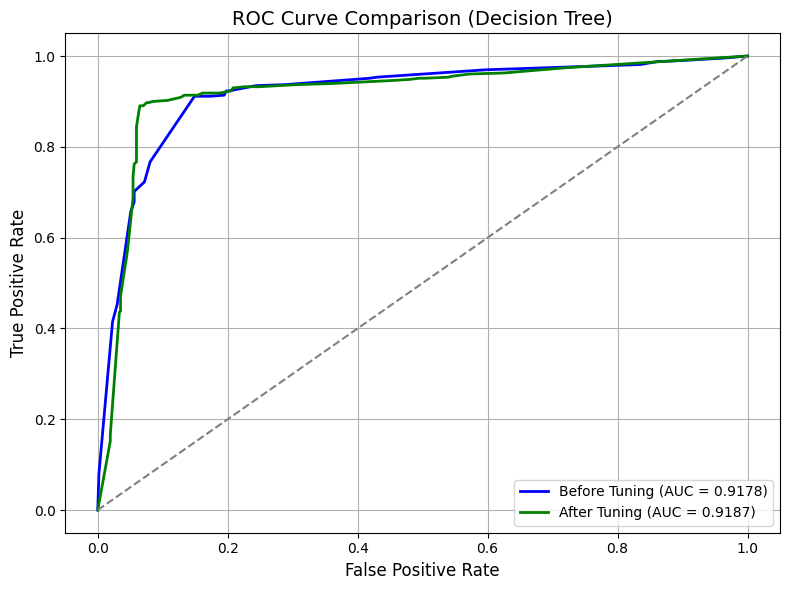

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities for ROC
y_scores_dt_no_tune = dt_base.predict_proba(X_test)[:, 1]
y_scores_dt_tuned = dt_tuned.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
fpr_dt_no_tune, tpr_dt_no_tune, _ = roc_curve(y_test, y_scores_dt_no_tune)
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test, y_scores_dt_tuned)

roc_auc_dt_no_tune = auc(fpr_dt_no_tune, tpr_dt_no_tune)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)

# Plot ROC Curve Comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_no_tune, tpr_dt_no_tune, label=f'Before Tuning (AUC = {roc_auc_dt_no_tune:.4f})', color='blue', linewidth=2)
plt.plot(fpr_dt_tuned, tpr_dt_tuned, label=f'After Tuning (AUC = {roc_auc_dt_tuned:.4f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and formatting
plt.title('ROC Curve Comparison (Decision Tree)', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


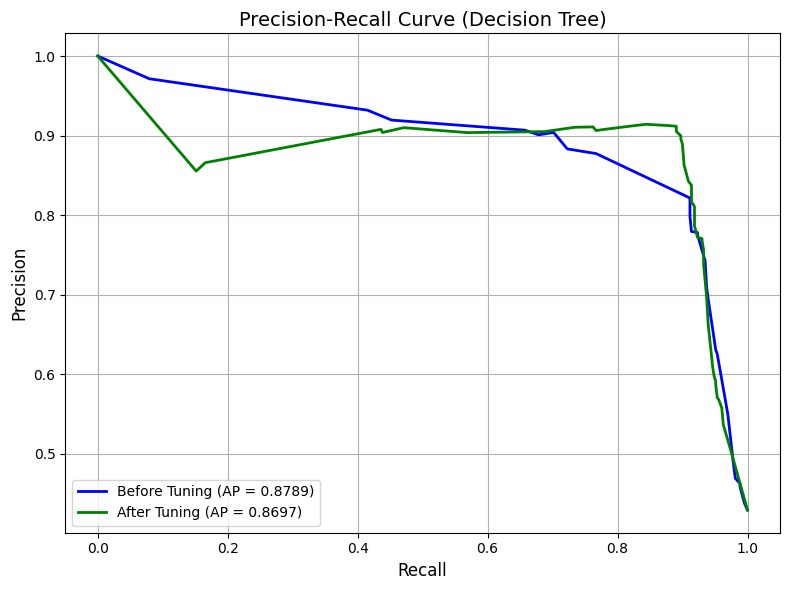

In [106]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predicted probabilities for class 1
y_scores_dt_no_tune = dt_base.predict_proba(X_test)[:, 1]
y_scores_dt_tuned = dt_tuned.predict_proba(X_test)[:, 1]

# Compute precision-recall curves
precision_no_tune, recall_no_tune, _ = precision_recall_curve(y_test, y_scores_dt_no_tune)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_scores_dt_tuned)

# Average precision scores
ap_no_tune = average_precision_score(y_test, y_scores_dt_no_tune)
ap_tuned = average_precision_score(y_test, y_scores_dt_tuned)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_no_tune, precision_no_tune, label=f'Before Tuning (AP = {ap_no_tune:.4f})', color='blue', linewidth=2)
plt.plot(recall_tuned, precision_tuned, label=f'After Tuning (AP = {ap_tuned:.4f})', color='green', linewidth=2)

# Formatting
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve (Decision Tree)', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


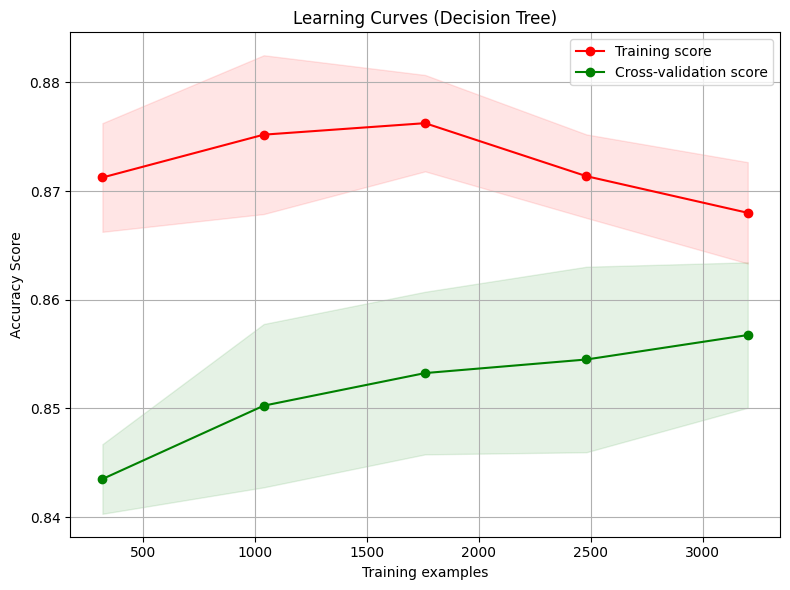

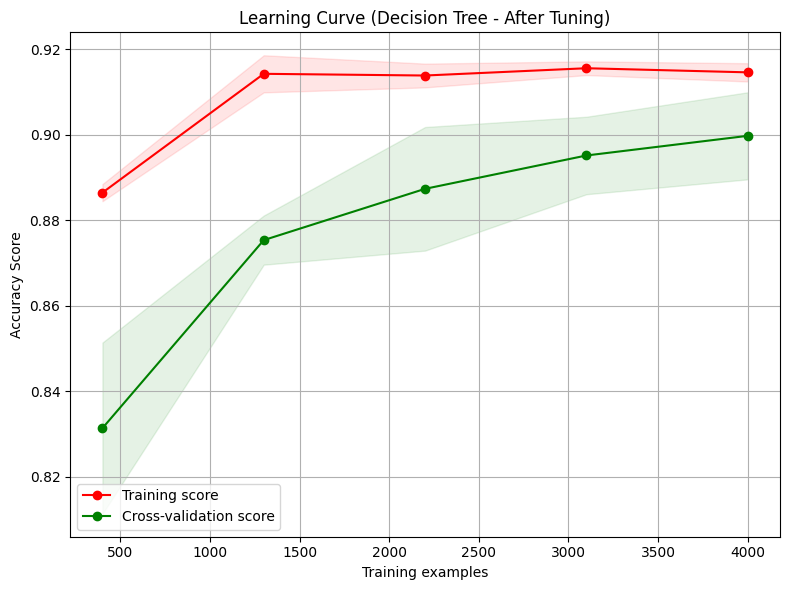

In [109]:
# Plot learning curve - Decision Tree (Before Tuning)
# Plot learning curves for Decision Tree
plot_learning_curve(
    dt_model, 
    "Learning Curves (Decision Tree)", 
    X_train, y_train, cv=5
)

# Plot learning curve - Decision Tree (After Tuning)
plot_learning_curve(
    estimator=dt_tuned,
    title="Learning Curve (Decision Tree - After Tuning)",
    X=X,
    y=y,
    cv=5,
    n_jobs=-1
)
